# Tesis Parte II

# Determinar mejor PCA


In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#cargamos los datos de entrada
#data = pd.read_csv("cleaned_dataset_tesis_no_cluster.csv")
dataframe = pd.read_csv(r"4-cleaned_dataset_tesis_no_cluster.csv")
print(dataframe.tail(10))

       gender  age  admission_type_id  discharge_disposition_id  \
99482       1   65                  1                         1   
99483       1   75                  1                         1   
99484       1   85                  1                         1   
99485       0   85                  1                         1   
99486       1   65                  1                         1   
99487       0   75                  1                         3   
99488       1   85                  1                         4   
99489       0   75                  1                         1   
99490       1   85                  2                         3   
99491       0   75                  1                         1   

       admission_source_id  time_in_hospital  num_lab_procedures  \
99482                    7                 2                  46   
99483                    7                 5                  21   
99484                    7                 5              

In [3]:
#normalizamos los datos
scaler=StandardScaler()
#df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
df = dataframe
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

In [4]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=46) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [5]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:3]))

print('suma: 3',sum(expl[0:3]))
print('suma: 4',sum(expl[0:4]))
print('suma: 5',sum(expl[0:5]))
print('suma: 6',sum(expl[0:6]))
print('suma: 8',sum(expl[0:8]))
print('suma: 9',sum(expl[0:9]))
print('suma: 10',sum(expl[0:10]))
print('suma: 11',sum(expl[0:11]))
print('suma: 12',sum(expl[0:12]))
print('suma: 13',sum(expl[0:13]))
print('suma: 15',sum(expl[0:15]))
print('suma: 20',sum(expl[0:20]))
#Vemos que con 30 componentes tenemos algo mas del 82% de varianza explicada
#Vemos que con 32 componentes tenemos algo mas del 86% de varianza explicada
#Vemos que con 33 componentes tenemos algo mas del 88% de varianza explicada
#Vemos que con 35 componentes tenemos algo mas del 91% de varianza explicada

shape of X_pca (99492, 46)
[6.36472872e-02 4.92335945e-02 4.50437965e-02 4.06824400e-02
 3.37848053e-02 3.21749372e-02 3.17255431e-02 2.98892131e-02
 2.78856767e-02 2.61871902e-02 2.49760146e-02 2.47951596e-02
 2.40676342e-02 2.34459797e-02 2.31224817e-02 2.29636308e-02
 2.27194632e-02 2.23388505e-02 2.21291648e-02 2.19001889e-02
 2.17712905e-02 2.17452670e-02 2.16832813e-02 2.15667200e-02
 2.13418587e-02 2.12680016e-02 2.11688155e-02 2.08483188e-02
 2.06884474e-02 2.04727204e-02 1.99456871e-02 1.85436817e-02
 1.79210142e-02 1.64155999e-02 1.55863560e-02 1.46140572e-02
 1.37993575e-02 1.25656468e-02 1.13944288e-02 1.02734256e-02
 8.67410854e-03 7.85112570e-03 7.14773799e-03 1.26609283e-32
 2.39213040e-33 1.29910220e-33]
suma: 0.15792467819757175
suma: 3 0.15792467819757175
suma: 4 0.19860711817476778
suma: 5 0.2323919234519264
suma: 6 0.26456686062035417
suma: 8 0.32618161683269364
suma: 9 0.3540672934920241
suma: 10 0.38025448371505044
suma: 11 0.40523049833887914
suma: 12 0.430025657

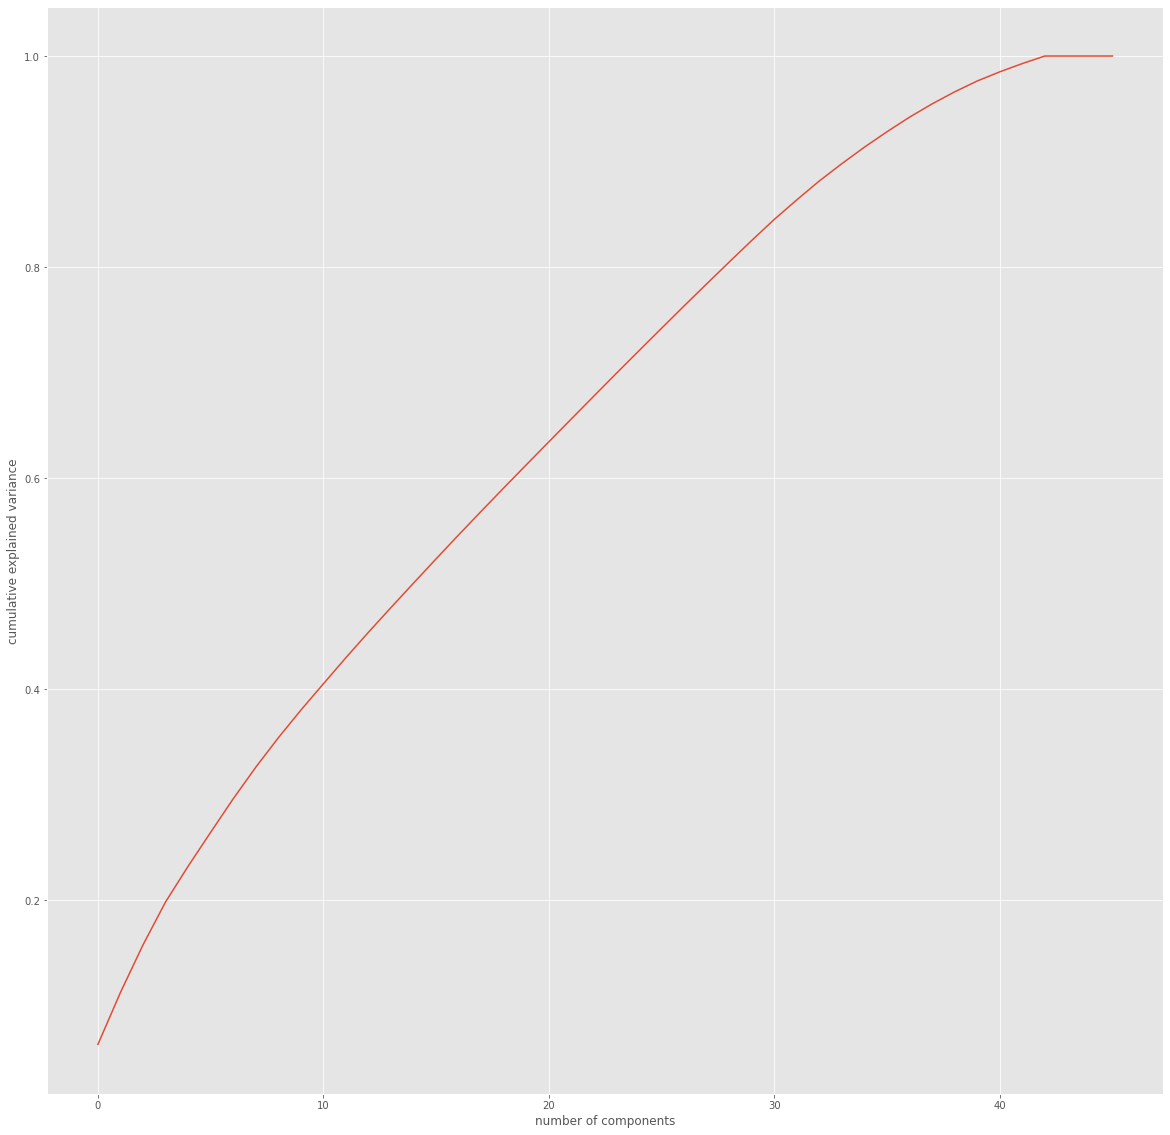

In [6]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

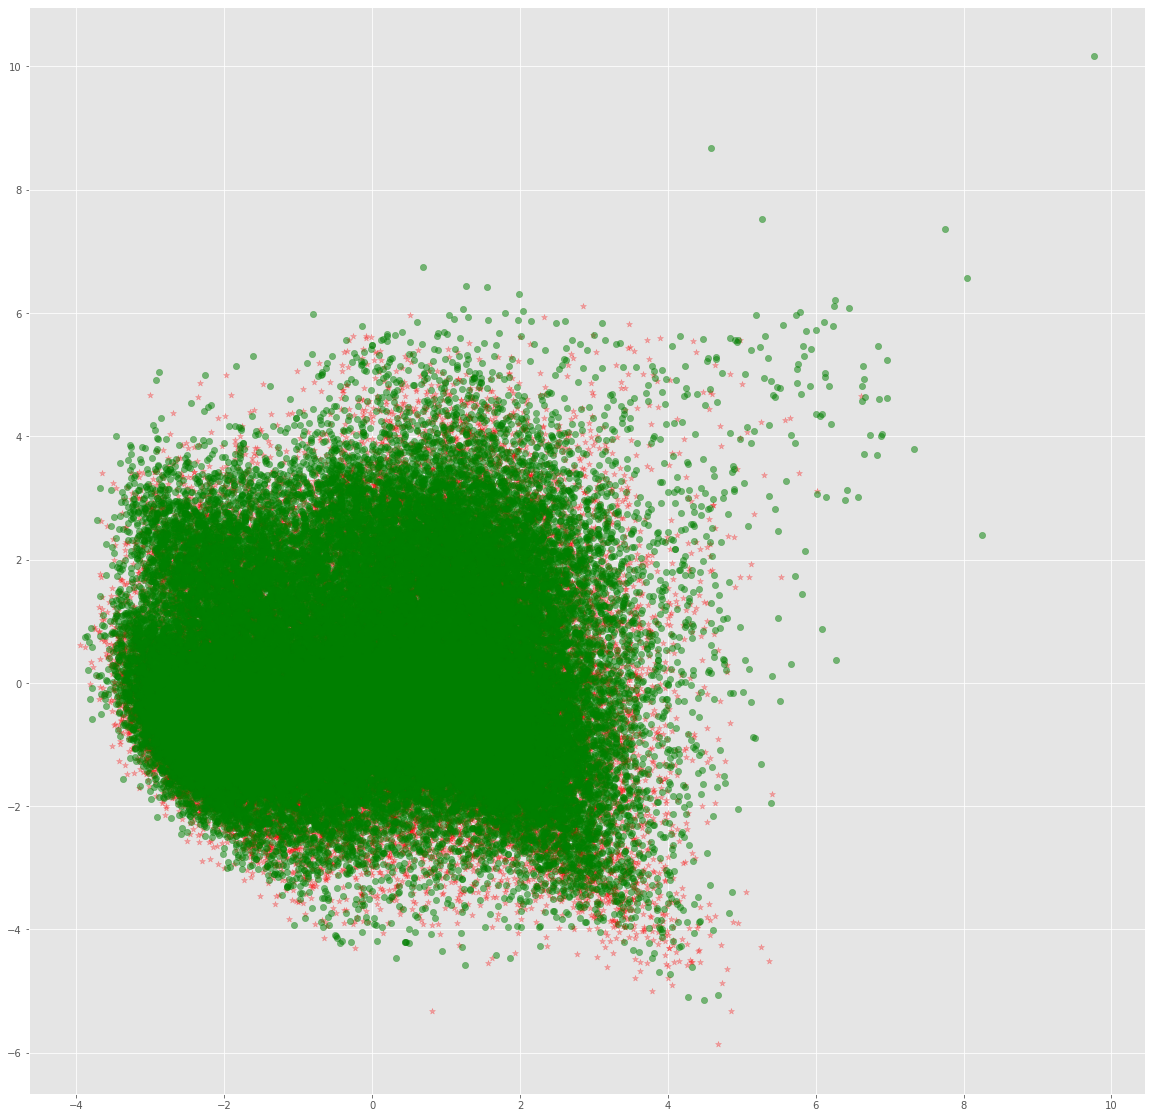

In [7]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['gender'].values
cdict={0:'red',1:'green'}
labl={0:'A',1:'B'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(20,20))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

No handles with labels found to put in legend.


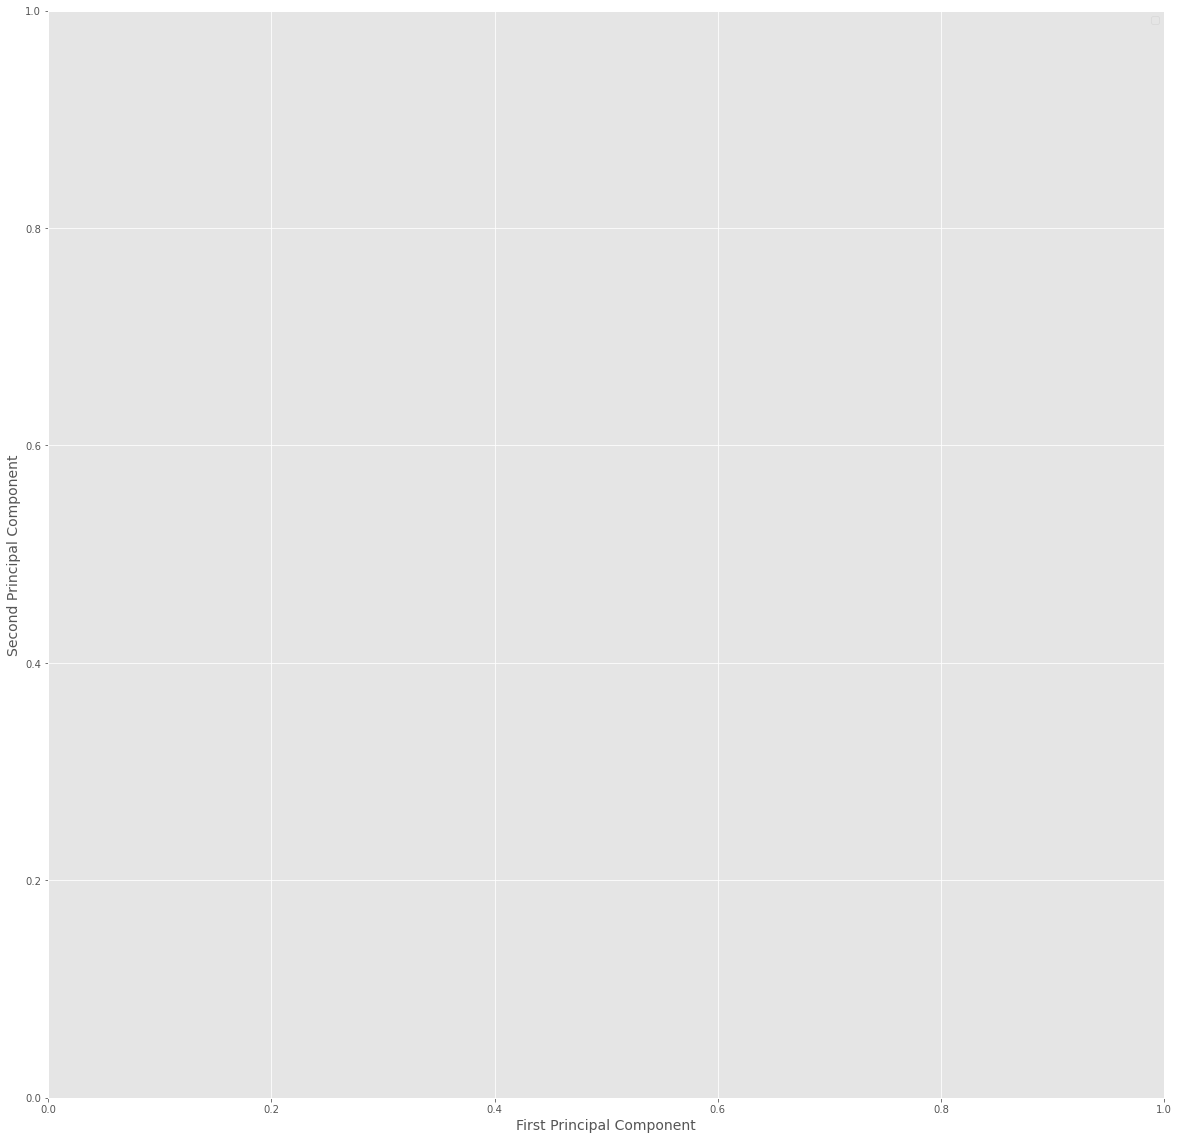

In [8]:
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()